In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [61]:
df = pd.read_csv('Apple Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [62]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [63]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [64]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [66]:
df = df.set_index('Date')

In [67]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [68]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [69]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [70]:
# Ensure the Date is treated as a datetime object
df.index = pd.to_datetime(df.index)
df.index.dtype

dtype('<M8[ns]')

In [71]:
df_2020 = df.loc['2020']
df_2020

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.339035,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.964951,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.181198,121047300


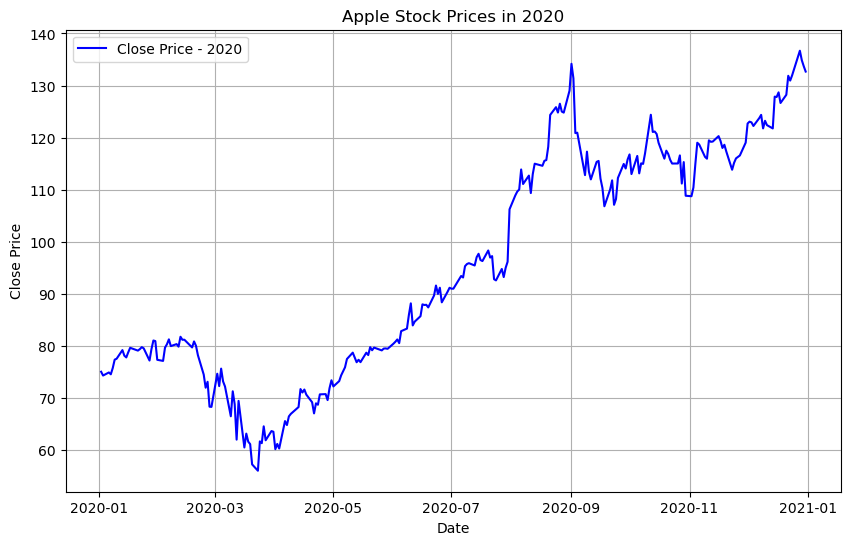

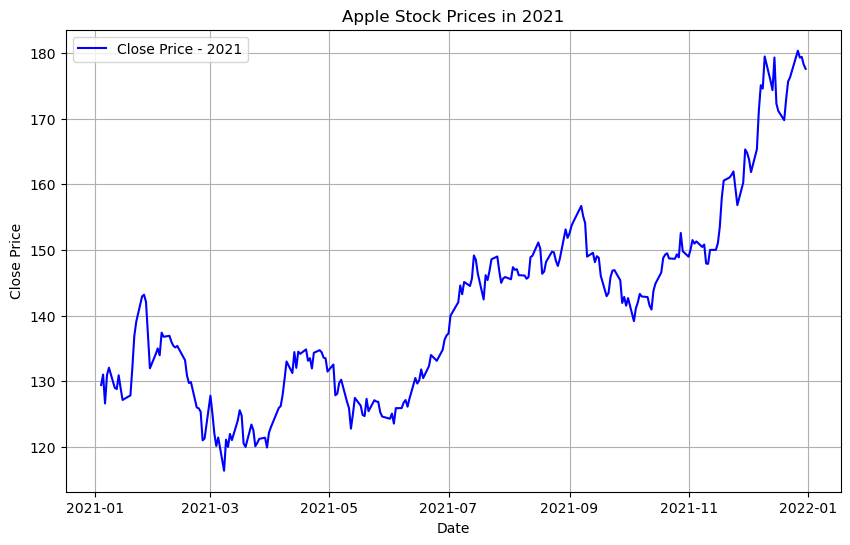

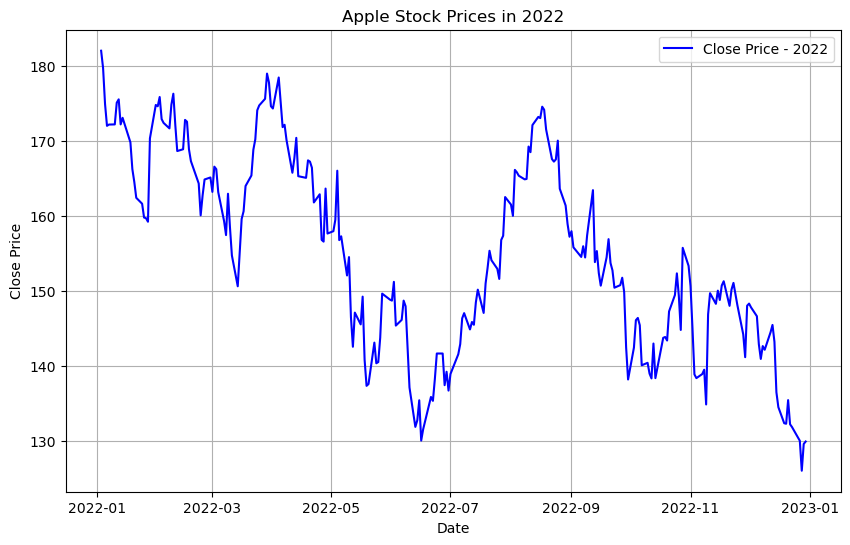

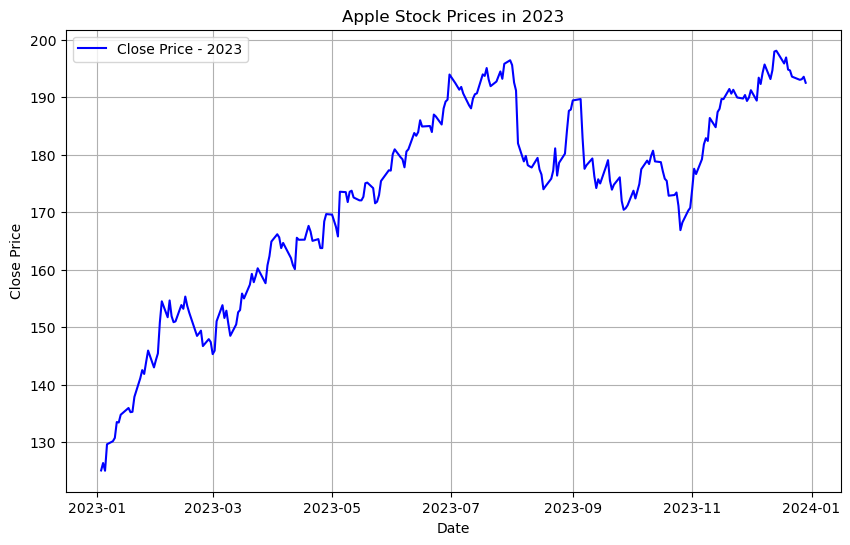

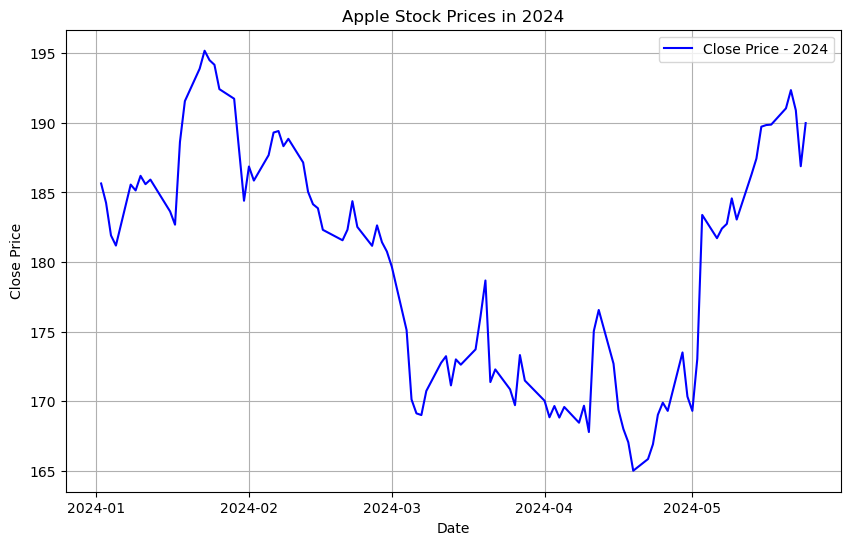

In [72]:
# Extract the last five years from the dataset
last_five_years = df.index.year.unique()[-5:]

# Plot Close price for each of the last five years in separate plots
for year in last_five_years:
    # Filter data for the current year
    df_year = df.loc[str(year)]
    
    # Create a new plot for the current year
    plt.figure(figsize=(10, 6))
    plt.plot(df_year.index, df_year['Close'], label=f'Close Price - {year}', color='blue')
    plt.title(f'Apple Stock Prices in {year}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    
    # Display the plot
    plt.show()


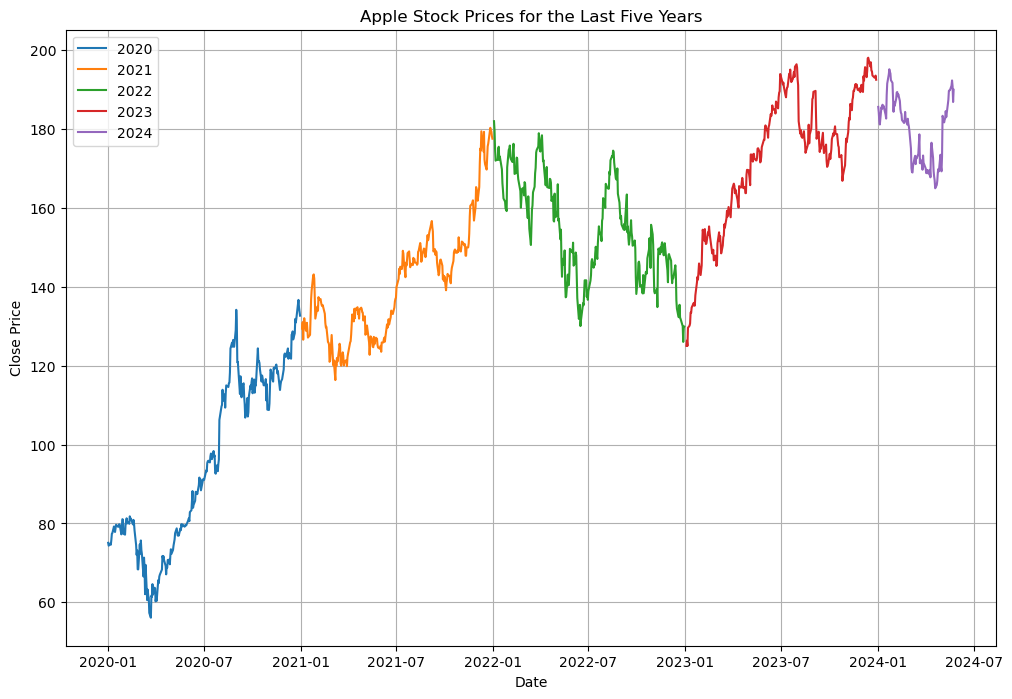

In [73]:
# Plot Close price for the last five years in a single plot
plt.figure(figsize=(12, 8))

# Loop through each of the last five years and plot their Close prices in the same figure
for year in last_five_years:
    df_year = df.loc[str(year)]
    plt.plot(df_year.index, df_year['Close'], label=f'{year}')

# Add title, labels, and legend
plt.title('Apple Stock Prices for the Last Five Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [74]:
# Create a new column 'Volume_Category' by categorizing 'Volume' into three categories using quantiles
volume_labels = ['Low', 'Medium', 'High']
df['Volume_Category'] = pd.qcut(df['Volume'], q=3, labels=volume_labels)

# Check the new feature
df[['Volume', 'Volume_Category']].head()


,Volume,Volume_Category
Date,,
1980-12-12,469033600,High
1980-12-15,175884800,Medium
1980-12-16,105728000,Low
1980-12-17,86441600,Low
1980-12-18,73449600,Low


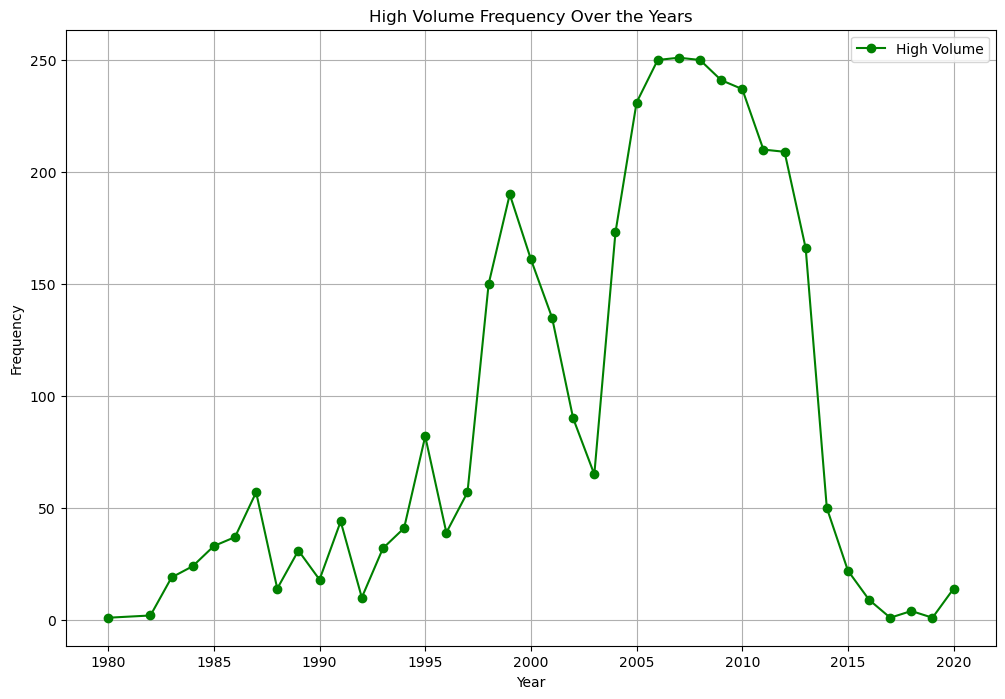

In [75]:
# Correcting the grouping issue by ensuring year extraction is done correctly
# Extract the year from the index and then group by year for high volume category

df['Year'] = df.index.year

# Filter only for 'High' volume category
high_volume_by_year = df[df['Volume_Category'] == 'High'].groupby('Year').size()

# Plot the High Volume category over the years
plt.figure(figsize=(12, 8))
plt.plot(high_volume_by_year.index, high_volume_by_year, label='High Volume', color='green', marker='o')

# Add titles and labels
plt.title('High Volume Frequency Over the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


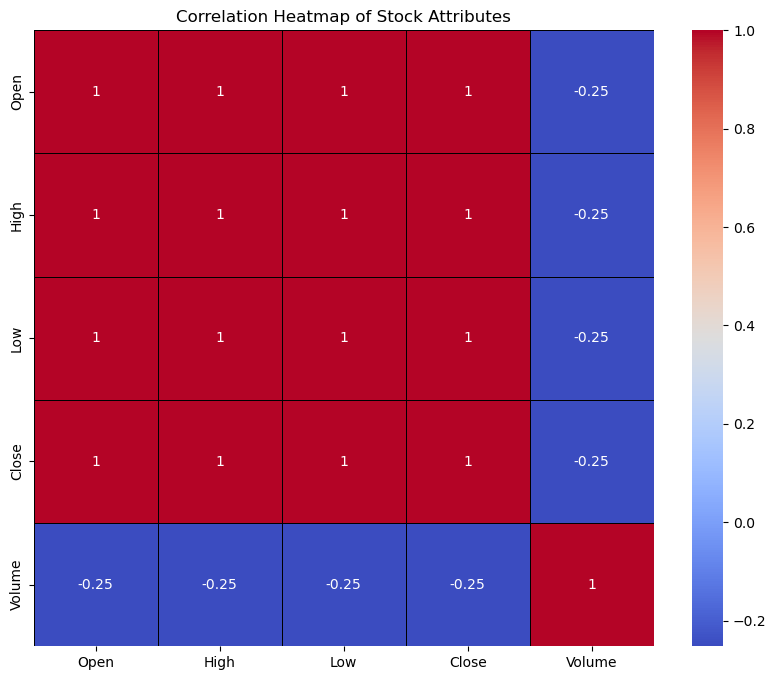

In [76]:
# Select relevant stock attributes for correlation analysis
stock_attributes = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Calculate the correlation matrix
correlation_matrix = stock_attributes.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Add title
plt.title('Correlation Heatmap of Stock Attributes')

# Display the plot
plt.show()

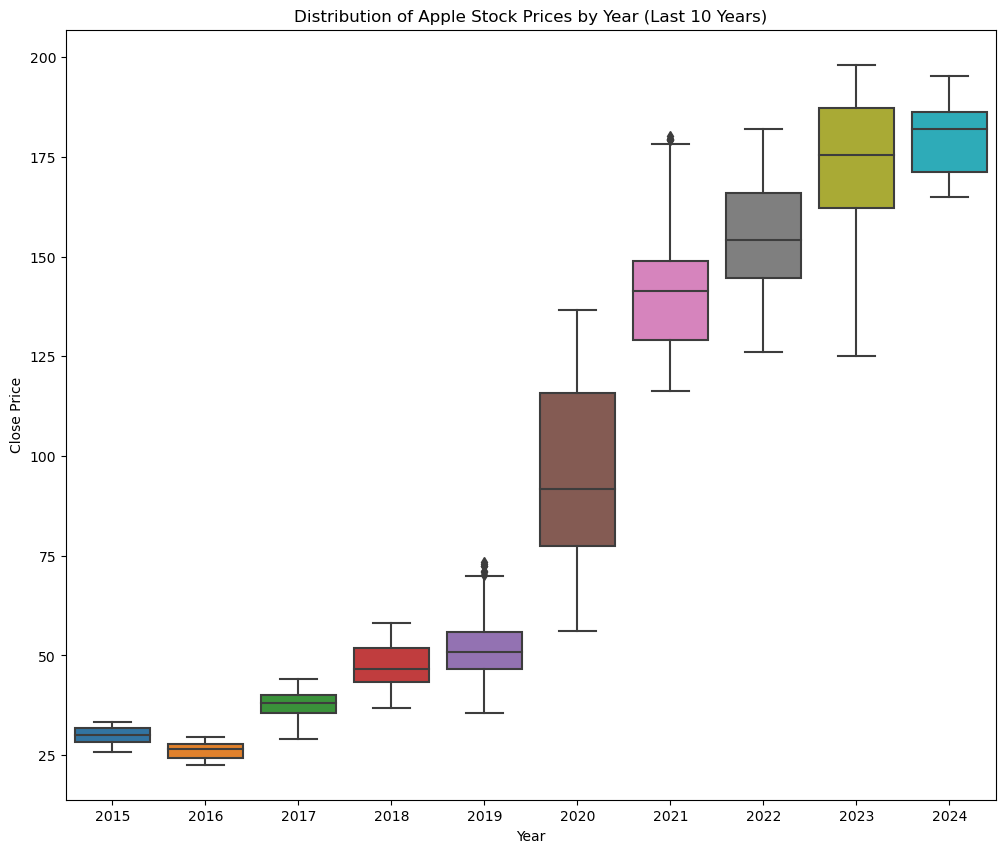

In [77]:
# Filter data for the last 10 years
last_ten_years = df[df['Year'] >= df['Year'].max() - 9]

# Create a box plot for the 'Close' prices grouped by the last 10 years
plt.figure(figsize=(12, 10))
sns.boxplot(x=last_ten_years['Year'], y=last_ten_years['Close'])

# Add titles and labels
plt.title('Distribution of Apple Stock Prices by Year (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Close Price')

# Display the plot
plt.show()


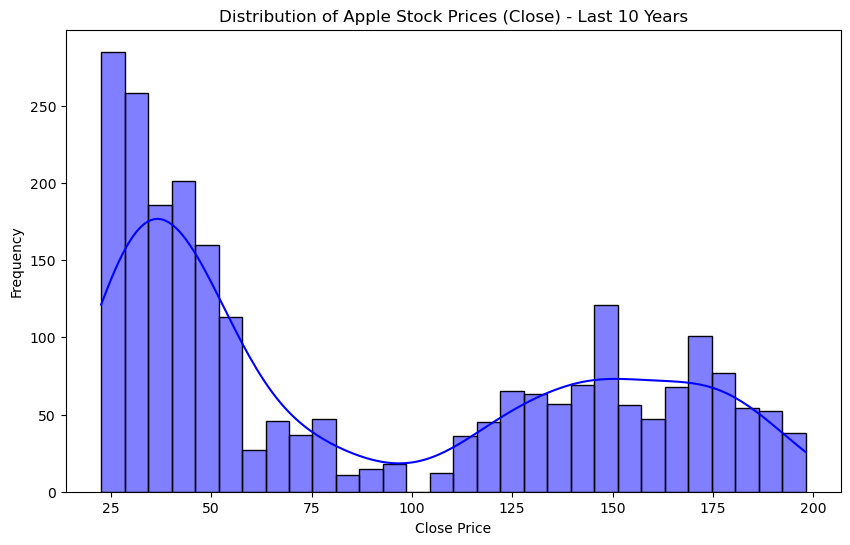

In [78]:
# Plot the distribution of the 'Close' prices for the last 10 years
plt.figure(figsize=(10, 6))
sns.histplot(last_ten_years['Close'], kde=True, color='blue', bins=30)

# Add titles and labels
plt.title('Distribution of Apple Stock Prices (Close) - Last 10 Years')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Normalize Features and Target 

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select features (Open, High, Low, Volume) and target (Close)
features = df[['Open', 'High', 'Low']]
target = df[['Close']]

# Fit the scaler to both features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create a DataFrame with scaled features and target
scaled_stock_data = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low'], index=df.index)
scaled_stock_data['Close'] = scaled_target

# Display the first few rows of the scaled data
scaled_stock_data.head()


,Open,High,Low,Close
Date,,,,
1980-12-12,0.000397,0.000397,0.000402,0.000400
1980-12-15,0.000366,0.000364,0.000368,0.000366
1980-12-16,0.000321,0.000319,0.000323,0.000321
1980-12-17,0.000333,0.000333,0.000337,0.000335
1980-12-18,0.000350,0.000350,0.000354,0.000352


## Step 1: Creating Sequences for LSTM 

In [81]:
def create_sequences(data, time_step=60):
    X = []
    y = []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # The sequence of past time steps (features)
        y.append(data[i, -1])  # The target value (Close price)
    return np.array(X), np.array(y)

# Convert the DataFrame to a NumPy array for LSTM
scaled_data = scaled_stock_data.values

# Create sequences using 60 time steps
time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Display the shape of the resulting arrays
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (10894, 60, 4), y shape: (10894,)


## Step 2: Splitting the Data 

In [82]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (8715, 60, 4), X_test shape: (2179, 60, 4)
y_train shape: (8715,), y_test shape: (2179,)


## Step 3: Building the LSTM Model 

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 3f13d4f82e8ca7a217b2e8ff98ce5e396a68cfce9607a13d31c9ba0ce66ba5ce
             Got        5ae784ffcaf0456b475569eb4d2cdf7ce5115b224f0c31d4a3a355711f3fb98e



   ---- ---------------------------------- 40.7/385.0 MB 139.7 kB/s eta 0:41:05
   ---- ---------------------------------- 40.7/385.0 MB 139.7 kB/s eta 0:41:05
   ---- ---------------------------------- 40.7/385.0 MB 139.7 kB/s eta 0:41:05
   ---- ---------------------------------- 40.7/385.0 MB 139.7 kB/s eta 0:41:05
   ---- ---------------------------------- 40.7/385.0 MB 139.7 kB/s eta 0:41:05
   ---- ---------------------------------- 40.7/385.0 MB 138.2 kB/s eta 0:41:31
   ---- ---------------------------------- 40.7/385.0 MB 138.2 kB/s eta 0:41:31
   ---- ---------------------------------- 40.7/385.0 MB 138.2 kB/s eta 0:41:31
   ---- ---------------------------------- 40.7/385.0 MB 138.2 kB/s eta 0:41:31
   ---- ---------------------------------- 40.7/385.0 MB 137.2 kB/s eta 0:41:51
   ---- ---------------------------------- 40.7/385.0 MB 137.2 kB/s eta 0:41:51
   ---- ---------------------------------- 40.7/385.0 MB 137.4 kB/s eta 0:41:47
   ---- --------------------------------

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add LSTM layer with 50 units and a dropout of 20% to avoid overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add Dense layer for output (one neuron for the Close price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Display training progress
print(f"Model training history: {history.history}")


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 4: Making Predictions and Evaluating 

In [1]:
# Make predictions on the test set
predicted_scaled_close = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_close = target_scaler.inverse_transform(predicted_scaled_close.reshape(-1, 1))

# Inverse transform the actual Close prices for comparison
actual_close = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs actual Close prices
plt.figure(figsize=(10, 6))
plt.plot(actual_close, label='Actual Close Price', color='blue')
plt.plot(predicted_close, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


NameError: name 'model' is not defined